In [1]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.cluster import KMeans  # K-means 임포트
from sklearn.preprocessing import StandardScaler

In [50]:
# 군집 알고리즘 연습을 위한 예제 데이터 생성
x = np.c_[[4, 20, 3, 19, 17, 8, 19, 18, 12.5],
         [15, 13, 13, 4, 17, 11, 12, 6, 9]]
x_df = pd.DataFrame(x, columns=['experience', 'violation'])
x_df

,experience,violation
0,4.0,15.0
1,20.0,13.0
2,3.0,13.0
3,19.0,4.0
4,17.0,17.0
5,8.0,11.0
6,19.0,12.0
7,18.0,6.0
8,12.5,9.0


## K-means 알고리즘

![kmeans](그림/kmeans.png)

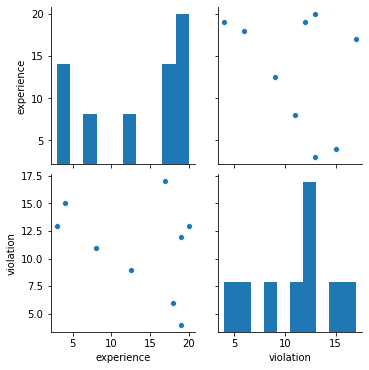

In [3]:
import seaborn as sns

sns.pairplot(x_df)

In [4]:
# 파라미터 설정
num_clusters = 3  # 군집 개수

In [25]:
?KMeans

In [12]:
# K-means 군집화 알고리즘 실행
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state = 12345)
kmeans.fit(x)
kmeans.labels_

array([1, 2, 1, 0, 2, 1, 2, 0, 0], dtype=int32)

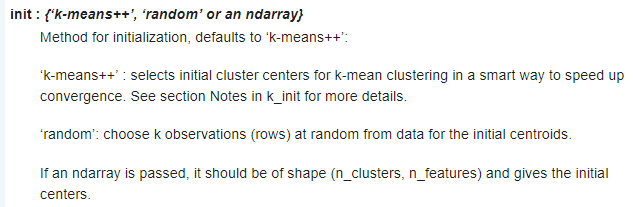

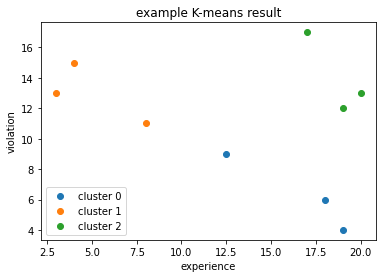

In [13]:
# 군집화 결과 plotting
unique_labels = np.unique(kmeans.labels_)  # 군집 종류

centroids = []
for i in unique_labels:  # 각 군집에 대해
    cluster_instance_mask = (kmeans.labels_ == i)
    
    x_cluster_i = x[cluster_instance_mask, :]  # 해당 군집에 속하는 인스턴스
    centroids.append(np.mean(x_cluster_i, axis=0))
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

plt.title('example K-means result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.legend()
plt.show()

In [8]:
print('manual_centroid: ', centroids)
print('model_centroid: ', kmeans.cluster_centers_)

manual_centroid:  [array([16.5       ,  6.33333333]), array([ 5., 13.]), array([18.66666667, 14.        ])]
model_centroid:  [[16.5         6.33333333]
 [ 5.         13.        ]
 [18.66666667 14.        ]]


# Practice 1: 아래 내용을 완성하세요

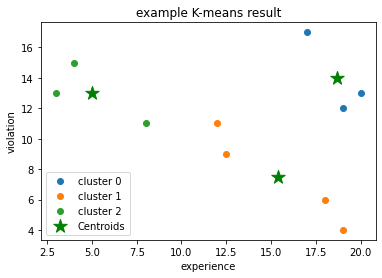

In [42]:
# 먼 객체들로 초기 객체 선정한 모형의 결과값(label) 저장
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state = 23).fit(x)
kmeans_pp_labels = kmeans.labels_
kmeans_pp_labels

unique_labels = np.unique(kmeans_pp_labels) # 군집 종류

for i in unique_labels:  # 각 군집에 대해
    cluster_member_mask = (kmeans_pp_labels == i)
    
    x_cluster_i = x[cluster_member_mask, :]  # 해당 군집에 해당하는 인스턴스
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 200, c = 'green', label = 'Centroids', marker = '*')
plt.title('example K-means result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.legend()
plt.show()

In [43]:
# 랜덤 초기화 방법으로 K-means 군집화 알고리즘 실행
kmeans_random = KMeans(n_clusters=num_clusters, init='random', random_state = 23)

# 랜덤 초기화 모형의 결과값(label) 저장
kmeans_random_labels = kmeans_random.fit(x).labels_
kmeans_random_labels

array([2, 1, 2, 0, 1, 2, 1, 0, 1, 1], dtype=int32)

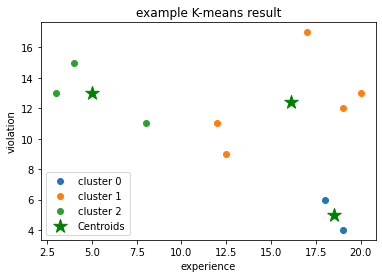

In [44]:
# 랜덤 초기화 군집화 결과 plotting
unique_labels = np.unique(kmeans_random_labels) # 군집 종류

for i in unique_labels:  # 각 군집에 대해
    cluster_member_mask = (kmeans_random.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]  # 해당 군집에 해당하는 인스턴스
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

plt.scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1],
           s = 200, c = 'green', label = 'Centroids', marker = '*')
plt.title('example K-means result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.legend()
plt.show()

In [48]:
# 데이터 x로부터 초기 중심객체로 사용할 1, 2, 3번째 인스턴스 추출
init_cents = x[1:4, :]
# 선정된 초기 중심객체를 이용해 K-means 군집화 알고리즘 실행
kmeans_manual = KMeans(n_clusters=num_clusters, init=init_cents, random_state = 23)

# 결과값 저장
kmeans_manual_labels = kmeans_manual.fit(x).labels_
kmeans_manual_labels

<ipython-input-48-206700d9936b>:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  kmeans_manual_labels = kmeans_manual.fit(x).labels_


array([1, 0, 1, 2, 0, 1, 0, 2, 2, 0], dtype=int32)

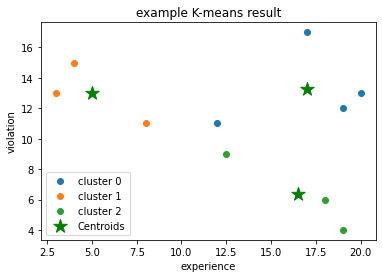

In [49]:
# 특정 객체 초기화 군집화 결과 plotting
unique_labels = np.unique(kmeans_manual_labels) # 군집 종류


for i in unique_labels:  # 각 군집에 대해
    cluster_member_mask = (kmeans_manual.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]  # 해당 군집에 해당하는 인스턴스

    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

plt.scatter(kmeans_manual.cluster_centers_[:, 0], kmeans_manual.cluster_centers_[:, 1],
           s = 200, c = 'green', label = 'Centroids', marker = '*')
plt.title('example K-means result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.legend()
plt.show()

In [16]:
?KMeans

# Practice 2: 아래 내용을 완성하세요

### 원본 데이터

In [55]:
def plot_kmeans(model, unique_labels, xlabel, ylabel):
    for i in unique_labels:  # 각 군집에 대해
        cluster_member_mask = (model.labels_ == i)

        x_cluster_i = x[cluster_member_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
               s = 200, c = 'green', label = 'Centroids', marker = '*')
    plt.title('example K-means result')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

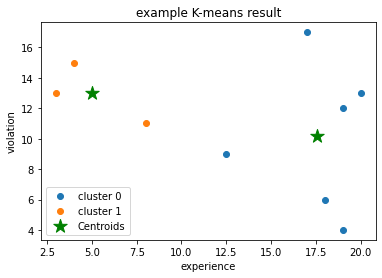

In [56]:
# 군집 개수 2개일 경우 (kmeans++ & without standardization)
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state = 23)


# 특정 객체 초기화 군집화 결과 plotting
unique_labels = np.unique(kmeans.fit(x).labels_) # 군집 종류

plot_kmeans(kmeans, unique_labels, 'experience', 'violation')

### 표준화(Standardization)된 데이터

<img src="그림/stand.png" width="300" height="300">

In [57]:
print(f'mean value: {x.mean(axis = 0)}, var value: {x.var(axis = 0)}')

mean value: [13.38888889 11.11111111], var value: [40.7654321  15.43209877]


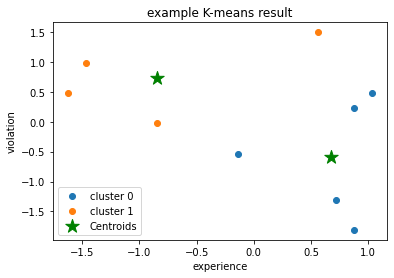

In [59]:
# 군집 개수 2개일 경우 (kmeans++ & with standardization)
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters, init= 'k-means++', random_state = 0).fit(x_std)

# 특정 객체 초기화 군집화 결과 plotting
unique_labels = np.unique(kmeans.labels_)  # 군집 종류

for i in unique_labels:  # 각 군집에 대해
    cluster_member_mask = (kmeans.labels_ == i)    
    x_cluster_i = x_std[cluster_member_mask, :]  # 해당 군집에 해당하는 인스턴스
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 200, c = 'green', label = 'Centroids', marker = '*')
plt.title('example K-means result')
plt.xlabel('experience')
plt.ylabel('violation')
plt.legend()
plt.show()

In [60]:
print(f'mean value: {x_std.mean(axis = 0).round()}, var value: {x_std.var(axis = 0)}')

mean value: [-0.  0.], var value: [1. 1.]


# 실습
>* Iris 데이터 불러오기 - pd.read_csv('./Dataset/Iris.csv')
* n_clusters 하이퍼파라미터를 3으로 설정해서 Kmeans 모형 생성
* x = 'SepalLengthCm'으로, y = 'SepalWidthCm'으로 설정하여 plotting 해볼 것
* x = 'PetalLengthCm'으로, y = 'PetalWidthCm'으로 설정하여 plotting 해볼 것

In [61]:
dataset = pd.read_csv('./Dataset/Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [62]:
x_df = dataset.iloc[:,1:5]
x = x_df.to_numpy()

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [66]:
kmeans = KMeans(n_clusters=3, init= 'k-means++', random_state = 0).fit(x)

# 특정 객체 초기화 군집화 결과 plotting
unique_labels = np.unique(kmeans.labels_)  # 군집 종류
unique_labels

array([0, 1, 2], dtype=int32)

In [64]:
def plot_kmeans(model, unique_labels, xlabel, ylabel, xlabel_index, ylabel_index):
    for i in unique_labels:  # 각 군집에 대해
        cluster_member_mask = (model.labels_ == i)

        x_cluster_i = x[cluster_member_mask, :]  # 해당 군집에 해당하는 인스턴스

        plt.scatter(x_cluster_i[:, xlabel_index], x_cluster_i[:, ylabel_index], label='cluster ' + str(i))  # 1번째, 2번째 변수를 이용해 plotting

    plt.scatter(model.cluster_centers_[:, xlabel_index], model.cluster_centers_[:, ylabel_index],
               s = 200, c = 'red', label = 'Centroids', marker = '*')
    plt.title('example K-means result')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

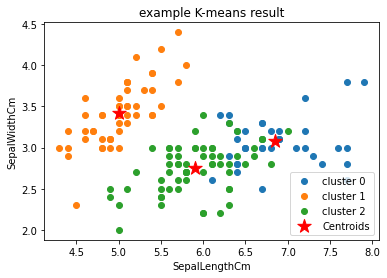

In [67]:
plot_kmeans(kmeans, unique_labels, 'SepalLengthCm', 'SepalWidthCm', 0, 1)

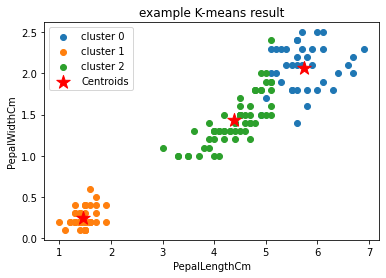

In [68]:
plot_kmeans(kmeans, unique_labels, 'PepalLengthCm', 'PepalWidthCm', 2, 3)

In [69]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])